In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:
length = 7.50241114482312

def load_profess_den(den_file):
    with open(den_file, 'r') as f:
        temp = f.readline().split()
        dim_x = int(temp[1])
        dim_y = int(temp[3])
        dim_z = int(temp[5])
        den = np.array(temp[10:], dtype=np.float_).reshape((dim_z, dim_x, dim_y))
        return den

def load_abacus_den(den_file):
    den = np.loadtxt(den_file, skiprows=17).reshape(40,40,40)
    return den

In [3]:
files = ['./KS-BLPS/fcc/OUT.blpstest/SPIN1_CHG','./WT/fcc/Al.den','./WGC//fcc/Al.den','./1PROFESS_KERNEL//fcc/Al.den','./3PROFESS_KERNEL//fcc/Al.den','./4PROFESS_KERNEL//fcc/Al.den','./5PROFESS_KERNEL/fcc/Al.den']
labels = ['KS-BLPS', 'WT', 'WGC', r'$\rm{TKK}^{\rm{m}}_{\rm{8}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{12}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{16}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{20}}$']

ks = load_abacus_den(files[0])
wt = load_profess_den(files[1])
wgc = load_profess_den(files[2])
tkk8 = load_profess_den(files[3])
tkk12 = load_profess_den(files[4])
tkk16 = load_profess_den(files[5])
tkk20 = load_profess_den(files[6])

data = [
    ks,
    wt,
    wgc,
    tkk8,
    tkk12,
    tkk16,
    tkk20
]

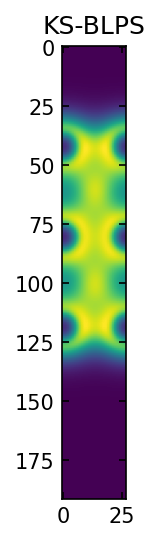

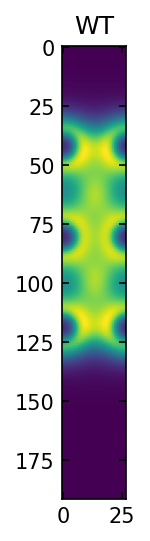

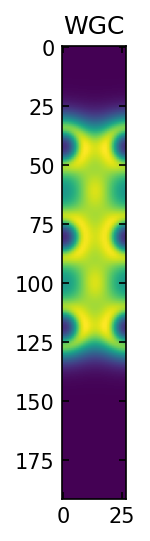

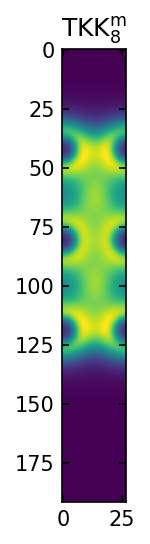

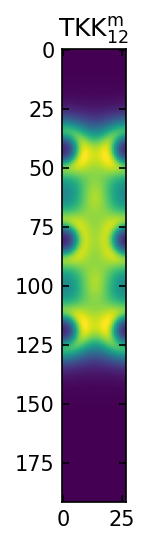

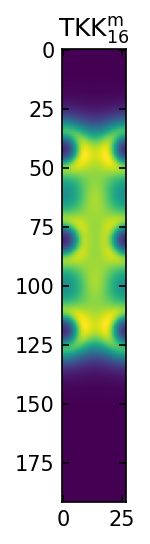

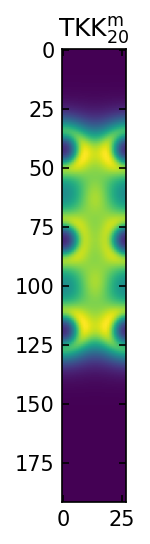

In [9]:
for i, each in enumerate(files):
    if 'KS' in each:
        den = load_abacus_den(each)
        plt.figure(dpi=150)
        plt.imshow(np.vstack((den[150:,0,:],den[:150,0,:])))
        plt.title(labels[i])
        plt.show()
    elif 'HC' in each:
        continue
    else:
        den = load_profess_den(each)
        plt.figure(dpi=150)
        plt.imshow(np.vstack((den[150:,0,:],den[:150,0,:])))
        plt.title(labels[i])
        plt.show()

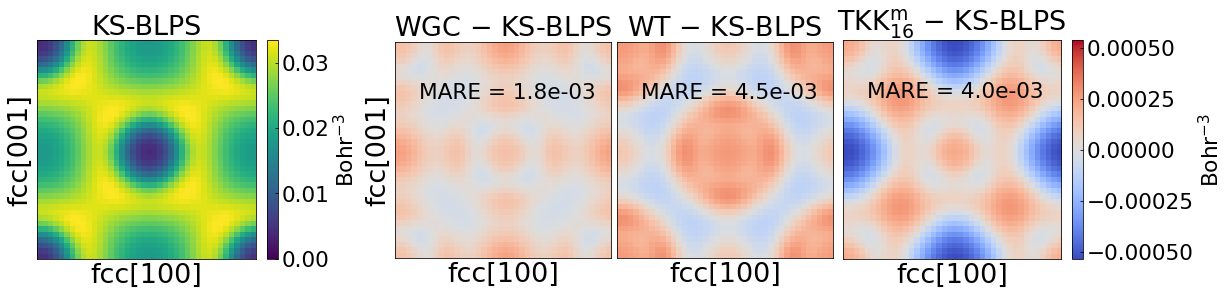

In [29]:
max1 = np.max(np.vstack([ks[:,0,:]]))
min1 = 0.
max2 = np.max(np.vstack([np.abs(ks[:,0,:] - wt[:,0,:]), np.abs(ks[:,0,:] - tkk16[:,0,:]), np.abs(ks[:,0,:] - wgc[:,0,:])]))
min2 = -max2

n = 35

# fig = plt.figure(figsize=(16,4), constrained_layout=True)
fig = plt.figure(figsize=(17,4), constrained_layout=True)
gs = plt.GridSpec(1,2+4*n,figure=fig)

plt.subplot(gs[0,0:n + 1])
plt.imshow(ks[:,0,:])
plt.clim(min1, max1)
plt.yticks([])
plt.xticks([])
plt.ylabel('fcc[001]', fontsize=27)
plt.xlabel('fcc[100]', fontsize=27)
plt.title('KS-BLPS', fontsize=27)
plt.rcParams['font.size'] = 21.6
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')

# plt.subplot(1,5,2)
# plt.imshow(np.vstack((wt[:,0,:],wt[:,0,:])))
# plt.clim(min1, max1)

# plt.subplot(1,5,3)
# plt.imshow(np.vstack((tkk16[:,0,:],tkk16[:,0,:])))
# plt.clim(min1, max1)
# plt.subplot(gs[2])

plt.subplot(gs[0,n + 1:2 * n + 1])
plt.imshow(wgc[:,0,:] - ks[:,0,:], cmap=cm.coolwarm)
# plt.text(4, 10, "MAE = %.1e" % np.mean(np.abs(wgc-ks)), fontsize=21.6)
plt.text(4, 10, "MARE = %.1e" % np.mean(np.abs(wgc-ks)/ks), fontsize=21.6)
plt.yticks([])
plt.xticks([])
plt.ylabel('fcc[001]', fontsize=27)
plt.xlabel('fcc[100]', fontsize=27)
plt.clim(min2, max2)
plt.title('WGC $-$ KS-BLPS', fontsize=27)

plt.subplot(gs[0,2*n+1:3*n+1])
plt.imshow(wt[:,0,:] - ks[:,0,:], cmap=cm.coolwarm)
# plt.text(4, 10, "MAE = %.1e" % np.mean(np.abs(wt-ks)), fontsize=21.6)
plt.text(4, 10, "MARE = %.1e" % np.mean(np.abs(wt-ks)/ks), fontsize=21.6)
plt.yticks([])
plt.xticks([])
plt.xlabel('fcc[100]', fontsize=27)
plt.clim(min2, max2)
plt.title('WT $-$ KS-BLPS', fontsize=27)

plt.subplot(gs[0,3*n+1:4*n+2])
plt.imshow(tkk16[:,0,:] - ks[:,0,:], cmap=cm.coolwarm)
# plt.text(4, 10, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=21.6)
plt.text(4, 10, "MARE = %.1e" % np.mean(np.abs(tkk16-ks)/ks), fontsize=21.6)
plt.yticks([])
plt.xticks([])
plt.xlabel('fcc[100]', fontsize=27)
plt.clim(min2, max2)
plt.title(r'$\rm{TKK}^{\rm{m}}_{\rm{16}}$ $-$ KS-BLPS', fontsize=27)
plt.rcParams['font.size'] = 21.6
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')

# plt.subplot(gs[7])

In [28]:
for i, each in enumerate(data):
    print(labels[i] + ":")
    print(np.mean(np.abs(each - ks)))

KS-BLPS:
0.0
WT:
0.0001139359794616931
WGC:
4.620071241331459e-05
$\rm{TKK}^{\rm{m}}_{\rm{8}}$:
0.0002735243682865857
$\rm{TKK}^{\rm{m}}_{\rm{12}}$:
6.0273035560922646e-05
$\rm{TKK}^{\rm{m}}_{\rm{16}}$:
9.997481492122439e-05
$\rm{TKK}^{\rm{m}}_{\rm{20}}$:
0.00013103779631599828
